# Chemotaxis

**Chemotaxis** is a behavior exhibited by single organisms in response to gradients of certain chemicals. In the presence of gradient of an attractant or repellant, the normally random motion of cells changes causing a net movement towards or away from the source of the chemical. This behavior is contributes to foraging for feed, fleeing from poisons, or to serve the needs of a large organism in development, injury, infection, and reproduction.

![](https://upload.wikimedia.org/wikipedia/commons/2/23/Chemotaxis1.jpg)

Attribution: By User:Fortinda
<a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, 
 <a href="https://commons.wikimedia.org/w/index.php?curid=53871041">Link</a>


For many organisms such as *E. coli*, the movement consists of alternating tumbling and swimming phases. The tumbling results in a new random direction. If cell senses that it is moving in the 'right' direction (i.e., towards an attractant or away from a repellant), the swimming phase will last somewhat longer. The biochemical mechanisms for this behavior is part of a signal transduction pathways for chemotactic organisms.

## Simulation with Simpy

Here we create a simulation of chemotaxis using Simpy. This is an exercise to demonstrate the utility of discrete-event simulation, so no attempt has been made to reproduce results from the current literature on the topic. [See, for example.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007548)

Motivated by [Brown and Berg (1974)](https://www.pnas.org/content/71/4/1388), we assume:

1. We will confine this simulation to two dimesions, $x$ and $y$.
2. The swimming motion consists of alternating 'twiddles' and straight runs. We assume a "twiddle time" of 0.1s.
3. The twiddles result in a new random direction described by the angle $\theta$ relative to the $x$ axis.
4. The run length depends on the temporal gradient experienced by the cell:
    * positive gradients increase the length of runs
    * negative gradients have little effect
    
Followning [a](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007548)
    
$$\tau = \begin{cases}
\tau_0 & \text{for} & \nabla_{\|}C \leq 0 \\ 
\tau_0\left(1 + \frac{\nabla_{\|}C}{\nabla C_0}\right) & \text{for} & 0 < \nabla_{\|}C  \leq \nabla C_0 \\
2\tau_0 & \text{for} & \nabla_{\|}C  > \nabla C_0
\end{cases}$$

where $\nabla C_0$ is the threshold gradient at which the maximum run time is reached, and $\nabla_{\|}C$ is a projection of the concentration gradient in the direction of swimming. We will assume *E. coli* swim at an average speed of 25$\mu$/s, and $\tau_0$ is one second.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import simpy

# dimension in mm
x_max = 10.0   
y_max = 10.0
tau = 1.0
V = 0.025

# dictionary to store tracks of each bacteria
tracks = {}

# concentration gradient
def C(x, y):
    return 1.0*x

# agent model
def swimmer(id, x_pos, y_pos):
    
    #  store initial position of particle n
    tracks[id] = {0: (x_pos, y_pos)}
    
    # variable to track distance traveled
    s = 0
    
    # angle traveliing
    a = np.random.uniform(0, 2*np.pi)
    
    # velocity
    vx, vy = v*np.cos(a), v*np.sin(a)
    
    while True:
        yield env.timeout(dt)
        dx = vx*dt
        dy = vy*dt
        x += dx
        y += dy
        track[n][env.now] = (x, y)
        p = np.random.uniform()
        if p <= 1.0*c(x,y)/(1 + c(x,y)):
            s = 0
        else:
            s += np.sqrt(dx**2 + dy**2)
        if s >= 2.0:
            s = 0
            a = np.random.uniform(0, 2*np.pi)
            vx, vy = v*np.cos(a), v*np.sin(a)
    
env = simpy.Environment()
for n in range(1000):
    env.process(agent(n, np.random.uniform(0, x_max), np.random.uniform(0, y_max)))
env.run(until=1000)

NameError: name 'agent' is not defined

NameError: name 'track' is not defined

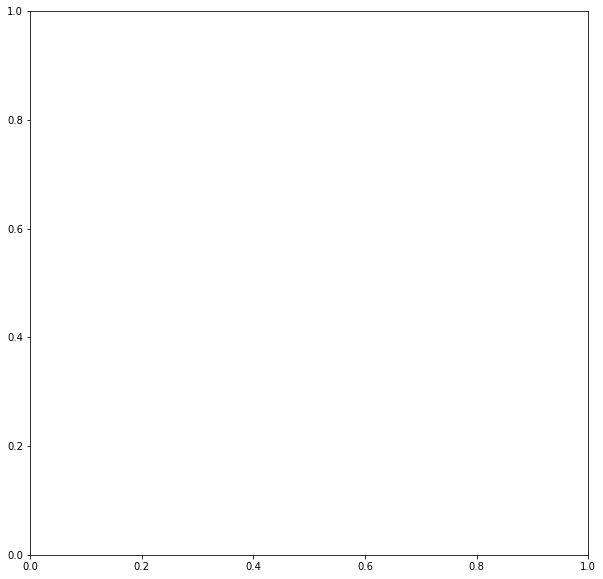

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for n in track.keys():
    pos = track[n].values()
    ax.plot([x for x,y in pos], [y for x,y in pos], lw=0.6, alpha=0.6)
    
ax.axis('equal')
ax.axis('square')

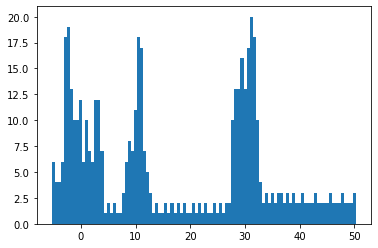

In [23]:
plt.hist([x for x,y in pos], bins = 100);